In [ ]:
import cv2

In [ ]:
cap = cv2.VideoCapture(0)

f = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter(r"\D:\OPENCV VIDEO\demo.mp4",f,40.0,(640,480))

while cap.isOpened():
    r,frame = cap.read()
    if r == True:
        frame = cv2.resize(frame,(500,500))
        frame = cv2.flip(frame,1)
        out.write(frame)
        cv2.imshow("videos",frame)
        if cv2.waitKey(1) & 0xff == ord("p"):
            break
        
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()
    
    

# Color Spaces In Opencv


# FIlter color with opencv

In [ ]:
import cv2
import numpy as np 

In [ ]:
cap = cv2.VideoCapture(0)

def wscube(x):
    pass
cv2.namedWindow("demo")
cv2.createTrackbar("1b","demo",0,255,wscube)
cv2.createTrackbar("1g","demo",0,255,wscube)
cv2.createTrackbar("1r","demo",0,255,wscube)

cv2.createTrackbar("ub","demo",255,255,wscube)
cv2.createTrackbar("ub","demo",255,255,wscube)
cv2.createTrackbar("ub","demo",255,255,wscube)

while cap.isOpened():
    r,frame = cap.read()
    if r == True:
        img = cv2.resize(frame,(500,400))
        hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
            
        Lb = cv2.getTrackbarPos("1b","demo")
        Lg = cv2.getTrackbarPos("1g","demo")
        Lr = cv2.getTrackbarPos("1r","demo")
            
        Ub = cv2.getTrackbarPos("Ub","demo")
        Ug = cv2.getTrackbarPos("Ug","demo")
        Ur = cv2.getTrackbarPos("Ur","demo")
            
            
        lo = np.array([Lb,Lg,Lr])
        up = np.array([Ub,Ug,Ur])
            
        masks = cv2.inRange(hsv_img,lo,up)
            
        res = cv2.bitwise_and(img,img,mask = masks)
        
        cv2.imshow("res",res)
        cv2.imshow("mask",masks)
        cv2.imshow("hsv",hsv_img)
        cv2.imshow("wscube",img)
            
        if cv2.waitKey(1) & 0xff == ord("p"):
            break
                
    else:
        break
cap.release()
cv2.destroyAllWindows()
        

In [ ]:
import cv2
import numpy as np

# Initialize video capture
cap = cv2.VideoCapture(0)

# Function to pass to trackbar (does nothing)
def wscube(x):
    pass

# Create a window named "demo"
cv2.namedWindow("demo")

# Create trackbars for lower and upper HSV ranges
cv2.createTrackbar("1H", "demo", 0, 255, wscube)
cv2.createTrackbar("1S", "demo", 0, 255, wscube)
cv2.createTrackbar("1V", "demo", 0, 255, wscube)

cv2.createTrackbar("uH", "demo", 255, 255, wscube)
cv2.createTrackbar("uS", "demo", 255, 255, wscube)
cv2.createTrackbar("uV", "demo", 255, 255, wscube)

while cap.isOpened():
    r, frame = cap.read()
    if r:
        img = cv2.resize(frame, (300, 200))
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Get current positions of all trackbars
        Lh = cv2.getTrackbarPos("1H", "demo")
        Ls = cv2.getTrackbarPos("1S", "demo")
        Lv = cv2.getTrackbarPos("1V", "demo")

        Uh = cv2.getTrackbarPos("uH", "demo")
        Us = cv2.getTrackbarPos("uS", "demo")
        Uv = cv2.getTrackbarPos("uV", "demo")

        # Define lower and upper HSV range for mask
        lo = np.array([Lh, Ls, Lv])
        up = np.array([Uh, Us, Uv])

        # Create mask
        mask = cv2.inRange(hsv_img, lo, up)

        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(img, img, mask=mask)

        # Display the resulting frames
        cv2.imshow("res", res)
        cv2.imshow("mask", mask)
        cv2.imshow("hsv", hsv_img)
        cv2.imshow("wscube", img)

        # Break loop on 'p' key press
        if cv2.waitKey(1) & 0xFF == ord('p'):
            break
    else:
        break

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()


# Perspective Tranformation

# Create camscanner 

In [ ]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread(r"modi_image.jpg")

cv2.circle(img,(18,30),4,(0,0,255),-1)
cv2.circle(img,(1107,78),4,(0,0,255),-1)
cv2.circle(img,(72,595),4,(0,0,255),-1)
cv2.circle(img,(1026,567),4,(0,0,255),-1)

print(img.shape)



cv2.imshow("images",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
w,h = (600,1127)

src1 = np.float32([[18, 30], [1107, 78], [72, 595], [1026, 567]])
dst1 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
m = cv2.getPerspectiveTransform(src1, dst1)
new_img = cv2.warpPerspective(img, m, (w, h))

cv2.imshow("images",new_img)
cv2.imshow("images1",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Simple Thresholding

In [ ]:
import cv2

In [ ]:
img = cv2.imread(r"D:\bharat\Images\shraddha.jpg")
img = cv2.resize(img,(500,400))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

_,th = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
# _,th1 = cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
_,th1 = cv2.threshold(img,200,255,cv2.THRESH_TRIANGLE)





cv2.imshow("images", img)
cv2.imshow("new_image",th)
cv2.imshow("new_image1",th1)
cv2.waitKey(0)
cv2.destroyAllWindows()



# Otus Thresholding

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread(r"D:\bharat\Images\pexels-kelly.jpg")
img =  cv2.resize(img,(500,500))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# hist = cv2.calcHist([img],[0],None,[255],[0,255])
# plt.plot(hist)
# plt.show()
_,th = cv2.threshold(img,200,255,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
cv2.imshow("threshold",img)
cv2.imshow("threshold1",th)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Histogram Plot

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
blank_w = np.ones((500,500,3),np.uint8 )*255
blank_b = np.zeros((500,500,3),np.uint8)*255

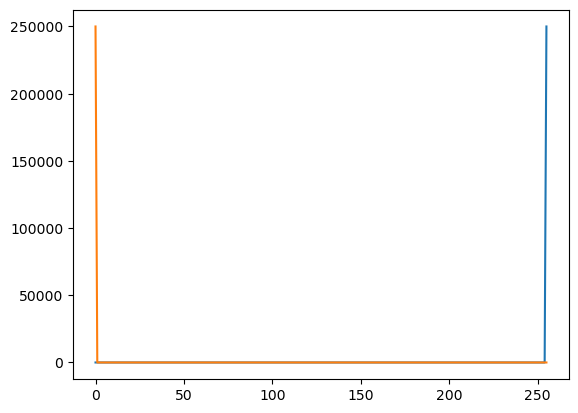

In [7]:
hist = cv2.calcHist([blank_w],[0],None,[256],[0,256])
hist1 = cv2.calcHist([blank_b],[0],None,[256],[0,256])
plt.plot(hist)
plt.plot(hist1)
plt.show()



cv2.imshow("white",blank_w)
cv2.imshow("black",blank_b)
cv2.waitKey(0)
cv2.destroyAllWindows()

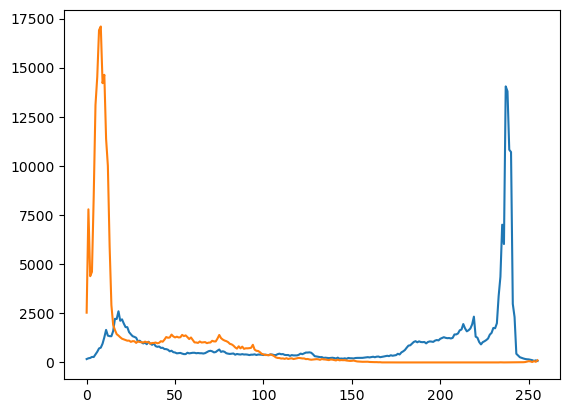

In [14]:
img = cv2.imread(r"D:\bharat\Images\prabhas-pooja.jpg")
img = cv2.resize(img,(500,500))
img1 = cv2.imread(r"D:\bharat\Images\hollywood.jpeg")
img1 = cv2.resize(img1,(500,500))
# print(img)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(hist)
plt.plot(hist1)
plt.show()



cv2.imshow("white",img)
cv2.imshow("black",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
import matplotlib.pyplot as plt
import cv2   

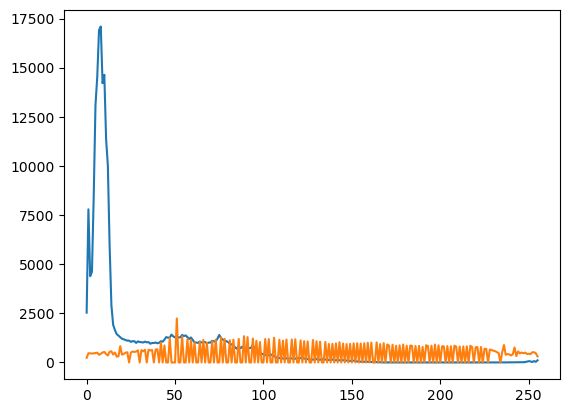

In [20]:
img = cv2.imread(r"D:\bharat\Images\ground.jpg")
img = cv2.resize(img,(300,400))
gry = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([img1],[0],None,[256],[0,256])
eq = cv2.equalizeHist(gry)
hist1 = cv2.calcHist([eq],[0],None,[256],[0,256])
plt.plot(hist)
plt.plot(hist1)
plt.show()

cv2.imshow("window",img)
cv2.imshow("window1",gry)
cv2.imshow("window2",eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

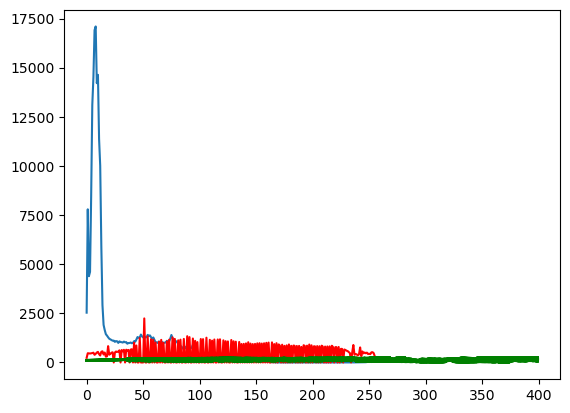

In [22]:
img = cv2.imread(r"D:\bharat\Images\ground.jpg")
img = cv2.resize(img,(300,400))

gry = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([img1],[0],None,[256],[0,256])

eq = cv2.equalizeHist(gry)
hist1 = cv2.calcHist([eq],[0],None,[256],[0,256])

c1 = cv2.createCLAHE(clipLimit = 1,tileGridSize = (8,8))
f = c1.apply(gry)

plt.plot(hist)
plt.plot(hist1, c = "red")
plt.plot(f,c = "green")
plt.show()

cv2.imshow("window",img)
# cv2.imshow("window1",gry)
cv2.imshow("window2",eq)
cv2.imshow("window3",f)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
import matplotlib.pyplot as plt
import cv2   

In [30]:
def python(event,x,y,f,p):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),5,(0,0,255),4)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.rectangle(img,(x,y),(x+20,y+20),(255,0,0),4)
        
cv2.namedWindow("window")
img = np.ones((500,500,3),np.uint8 )*255
cv2.setMouseCallback("window",python)
while True:
    cv2.imshow("window",img)
    if cv2.waitKey(0) & 0xff == ord("p"):
        break
cv2.destroyAllWindows()

In [31]:
import cv2
import numpy as np

# Define the callback function for mouse events
def draw_shapes(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x, y), 5, (0, 0, 255), 4)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.rectangle(img, (x, y), (x + 20, y + 20), (255, 0, 0), 4)

# Create a window and an image
cv2.namedWindow("window")
img = np.ones((500, 500, 3), np.uint8) * 255

# Set the mouse callback function for the window
cv2.setMouseCallback("window", draw_shapes)

# Main loop
while True:
    cv2.imshow("window", img)
    if cv2.waitKey(1) & 0xFF == ord('p'):
        break

# Destroy all windows
cv2.destroyAllWindows()


# Image Contours

In [32]:
import cv2

In [74]:
img = cv2.imread(r"D:\bharat\Images\chrome_logo.webp")
img = cv2.resize(img,(500,500))


img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

r,th = cv2.threshold(img1, 245, 255, cv2.THRESH_BINARY)

c,h  = cv2.findContours(th,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

new_img = cv2.drawContours(img,c, -1,(255,0,0),2)
 

# cv2.imshow("window",img)
cv2.imshow("window1",img1)
cv2.imshow("window2",new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Contour Moments  and Convex Hull 

In [67]:
import cv2

In [91]:
img = cv2.imread(r"D:\bharat\Images\xpolygons.jpg")
img = cv2.resize(img,(500,500))

img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
r,th = cv2.threshold(img1,225,255,cv2.THRESH_BINARY)

cnt,h = cv2.findContours(th,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
new_img = cv2.drawContours(img.copy(),cnt,-1,(0,0,255),4)

# to find the area (center, center of mass , mass etc )
for c in cnt:
    m = cv2.moments(c)
    if m["m00"] != 0: 
        x = int(m["m10"]/m["m00"])
        y = int(m["m01"]/m["m00"])
#         cv2.drawContours(img,cnt,-1,(0,0,255),4)
        cv2.circle(img,(x,y),2,(255,0,0),-1)

    


# cv2.imshow("window",img1)
# cv2.imshow("window1",th)
cv2.imshow("window2",new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [93]:
import cv2
import numpy as np

# Read and resize the image
img = cv2.imread(r"D:\bharat\Images\xpolygons.jpg")
img = cv2.resize(img, (500, 500))

# Convert to grayscale
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
_, th = cv2.threshold(img1, 225, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours
new_img = cv2.drawContours(img.copy(), contours, -1, (0, 0, 255), 4)

# Find and draw centroids of each contour
ar =[]
for c in contours:
    m = cv2.moments(c)
    if m["m00"] != 0:  # To avoid division by zero
        x = int(m["m10"] / m["m00"])
        y = int(m["m01"] / m["m00"])
        cv2.circle(new_img, (x, y), 5, (255, 0, 0), -1)
        a = cv2.contourArea(c)
        ar.append(a)
        
print(ar)
# Display the result
cv2.imshow("Original Image", img)
cv2.imshow("Threshold Image", th)
cv2.imshow("Contours with Centroids", new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


[248003.0, 13198.0, 13066.0, 12912.5, 13142.0, 12326.0, 12800.5, 11944.0, 12610.5, 8998.0, 6058.5, 11409.5, 10451.0]


In [96]:
import cv2
import numpy as np

# Read and resize the image
img = cv2.imread(r"D:\bharat\Images\xpolygons.jpg")
img = cv2.resize(img, (500, 500))

# Convert to grayscale
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
_, th = cv2.threshold(img1, 225, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours
new_img = cv2.drawContours(img.copy(), contours, -1, (0, 0, 255), 4)

# Find and draw centroids of each contour
ar =[]
for c in contours:
    m = cv2.moments(c)
    if m["m00"] != 0:  # To avoid division by zero
        x = int(m["m10"] / m["m00"])
        y = int(m["m01"] / m["m00"])
        cv2.circle(new_img, (x, y), 5, (255, 0, 0), -1)
        a = cv2.contourArea(c)
        ar.append(a)
        ep = 0.1*cv2.arcLength(c,True)           # jo ki hmare pass area aya he uski arc ki length ko count krega fir usme se maximum area nikalega
        d = cv2.approxPolyDP(c,ep,True)
        h = cv2.convexHull(d)
        x,y,w,h = cv2.boundingRect(h)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),5)
        
        
        
        
print(ar)
# Display the result
cv2.imshow("Original Image", img)
cv2.imshow("Threshold Image", th)
cv2.imshow("Contours with Centroids", new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[248003.0, 13198.0, 13066.0, 12912.5, 13142.0, 12326.0, 12800.5, 11944.0, 12610.5, 8998.0, 6058.5, 11409.5, 10451.0]


# Object Detection  using Contour 

In [1]:
import cv2
import numpy as np

In [3]:
def nothing(x):
    pass

cv2.namedWindow("wscube")

cv2.createTrackbar("th","wscube",0,255,nothing)

cv2.createTrackbar("lb","wscube",0,255,nothing)
cv2.createTrackbar("lg","wscube",0,255,nothing)
cv2.createTrackbar("lr","wscube",0,255,nothing)

cv2.createTrackbar("ub","wscube",255,255,nothing)
cv2.createTrackbar("ug","wscube",255,255,nothing)
cv2.createTrackbar("ur","wscube",255,255,nothing)

cap = cv2.VideoCapture(0)
while cap.isOpened():
    r, frame = cap.read()
    if r == True:
        thr = cv2.getTrackbarPos("th","wscube")
        
        LB = cv2.getTrackbarPos("lb","wscube")
        LG = cv2.getTrackbarPos("lg","wscube")
        LR = cv2.getTrackbarPos("lr","wscube")
        
        
        HB = cv2.getTrackbarPos("hb","wscube")
        HG = cv2.getTrackbarPos("hg","wscube")
        HR = cv2.getTrackbarPos("hr","wscube")
        
        lower = np.array([LB,LG,LR])
        upper = np.array([HB,HG,HR])
        
        
        
        
        frame = cv2.flip(frame, 1)
        frame = cv2.resize(frame,(300,300))
        hsv  = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        # Design a mask
        m = cv2.inRange(hsv,lower,upper)
        res = cv2.bitwise_and(frame,frame,mask = m)
        
        
        cv2.imshow("res",res)
        cv2.imshow("mask",m)     
        cv2.imshow("ws",frame)
        if cv2.waitKey(25) & 0xff  == ord("q"):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [5]:
import cv2
import numpy as np

In [7]:


def nothing(x):
    pass

# Create a window
cv2.namedWindow("wscube")

# Create trackbars for threshold and HSV color space limits
cv2.createTrackbar("Threshold", "wscube", 0, 255, nothing)

cv2.createTrackbar("Lower B", "wscube", 0, 255, nothing)
cv2.createTrackbar("Lower G", "wscube", 0, 255, nothing)
cv2.createTrackbar("Lower R", "wscube", 0, 255, nothing)

cv2.createTrackbar("Upper B", "wscube", 255, 255, nothing)
cv2.createTrackbar("Upper G", "wscube", 255, 255, nothing)
cv2.createTrackbar("Upper R", "wscube", 255, 255, nothing)

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Get the current positions of trackbars
        threshold_value = cv2.getTrackbarPos("Threshold", "wscube")
        
        LB = cv2.getTrackbarPos("Lower B", "wscube")
        LG = cv2.getTrackbarPos("Lower G", "wscube")
        LR = cv2.getTrackbarPos("Lower R", "wscube")
        
        UB = cv2.getTrackbarPos("Upper B", "wscube")
        UG = cv2.getTrackbarPos("Upper G", "wscube")
        UR = cv2.getTrackbarPos("Upper R", "wscube")
        
        lower = np.array([LB, LG, LR])
        upper = np.array([UB, UG, UR])
        
        frame = cv2.flip(frame, 1)
        frame = cv2.resize(frame, (300, 300))
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Create a mask based on the HSV color range
        mask = cv2.inRange(hsv, lower, upper)
        res = cv2.bitwise_and(frame, frame, mask=mask)
        fr = cv2.bitwise_not(res)
        
        thi = cv2.threshold(mask,thr,255,cv2.THRESH_BINARY)
        
        cnt,hr = cv2.findContours(thi,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        
        cv2.drawContours(frame,cnt,-1,(255,0,0),2)
        
        cv2.imshow("thr",thi)
        cv2.imshow("res", res)
        cv2.imshow("mask", mask)
        cv2.imshow("ws", frame)
        
        if cv2.waitKey(25) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


NameError: name 'thr' is not defined

In [1]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a window
cv2.namedWindow("wscube")

# Create trackbars for threshold and HSV color space limits
cv2.createTrackbar("Threshold", "wscube", 0, 255, nothing)

cv2.createTrackbar("Lower B", "wscube", 0, 255, nothing)
cv2.createTrackbar("Lower G", "wscube", 0, 255, nothing)
cv2.createTrackbar("Lower R", "wscube", 0, 255, nothing)

cv2.createTrackbar("Upper B", "wscube", 255, 255, nothing)
cv2.createTrackbar("Upper G", "wscube", 255, 255, nothing)
cv2.createTrackbar("Upper R", "wscube", 255, 255, nothing)

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Get the current positions of trackbars
        threshold_value = cv2.getTrackbarPos("Threshold", "wscube")
        
        LB = cv2.getTrackbarPos("Lower B", "wscube")
        LG = cv2.getTrackbarPos("Lower G", "wscube")
        LR = cv2.getTrackbarPos("Lower R", "wscube")
        
        UB = cv2.getTrackbarPos("Upper B", "wscube")
        UG = cv2.getTrackbarPos("Upper G", "wscube")
        UR = cv2.getTrackbarPos("Upper R", "wscube")
        
        lower = np.array([LB, LG, LR])
        upper = np.array([UB, UG, UR])
        
        frame = cv2.flip(frame, 1)
        frame = cv2.resize(frame, (300, 300))
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Create a mask based on the HSV color range
        mask = cv2.inRange(hsv, lower, upper)
        res = cv2.bitwise_and(frame, frame, mask=mask)
        
        # Invert the result
        fr = cv2.bitwise_not(res)
        
        # Apply threshold
        ret, thresholded = cv2.threshold(mask, threshold_value, 255, cv2.THRESH_BINARY)
        
        # Find contours
        cnt, hr = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # Draw contours
        cv2.drawContours(frame, cnt, -1, (255, 0, 0), 2)
        
        cv2.imshow("Thresholded", thresholded)
        cv2.imshow("Result", res)
        cv2.imshow("Mask", mask)
        cv2.imshow("Webcam Feed", frame)
        
        if cv2.waitKey(25) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()
